<a href="https://colab.research.google.com/github/jeremy-08-ed/PraktikumML/blob/main/LaprakML_A2_24060119130071_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tugas Praktikum 3 Machine Learning
Nama: Jeremy Edbert Widjaja<br>
NIM: 24060119130071<br>
Kelas: A2 <br>

Iris Data Set<br>
URL UCI: https://archive.ics.uci.edu/ml/datasets/iris<br>
URL Raw: https://raw.githubusercontent.com/jeremy-08-ed/PraktikumML/main/iris.data

##Import Library

In [ ]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##Import Dataset

In [ ]:
url = 'https://raw.githubusercontent.com/jeremy-08-ed/PraktikumML/main/iris.data'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(url, names=names)
df.head(20)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


##Informasi Dataset dan Visualisasi Data

In [ ]:
df.shape

(150, 5)

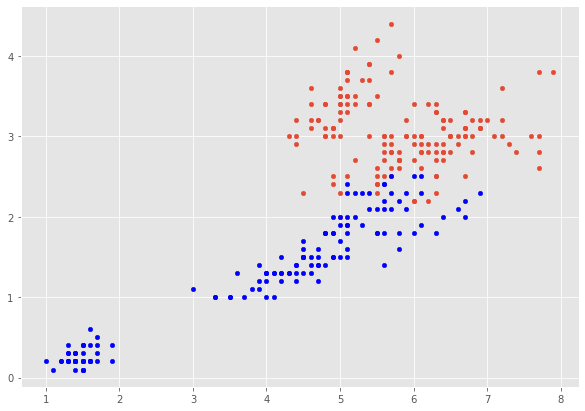

In [ ]:
# Plot dataset
f1 = df['sepal-length'].values
f2 = df['sepal-width'].values
f3 = df['petal-length'].values
f4 = df['petal-width'].values
X = np.array(list(zip(f1, f2, f3, f4)))
plt.figure(figsize=(10,7))
# Sepal
plt.scatter(f1, f2, s=20)
# Petal
plt.scatter(f3, f4, c="blue", s=20)

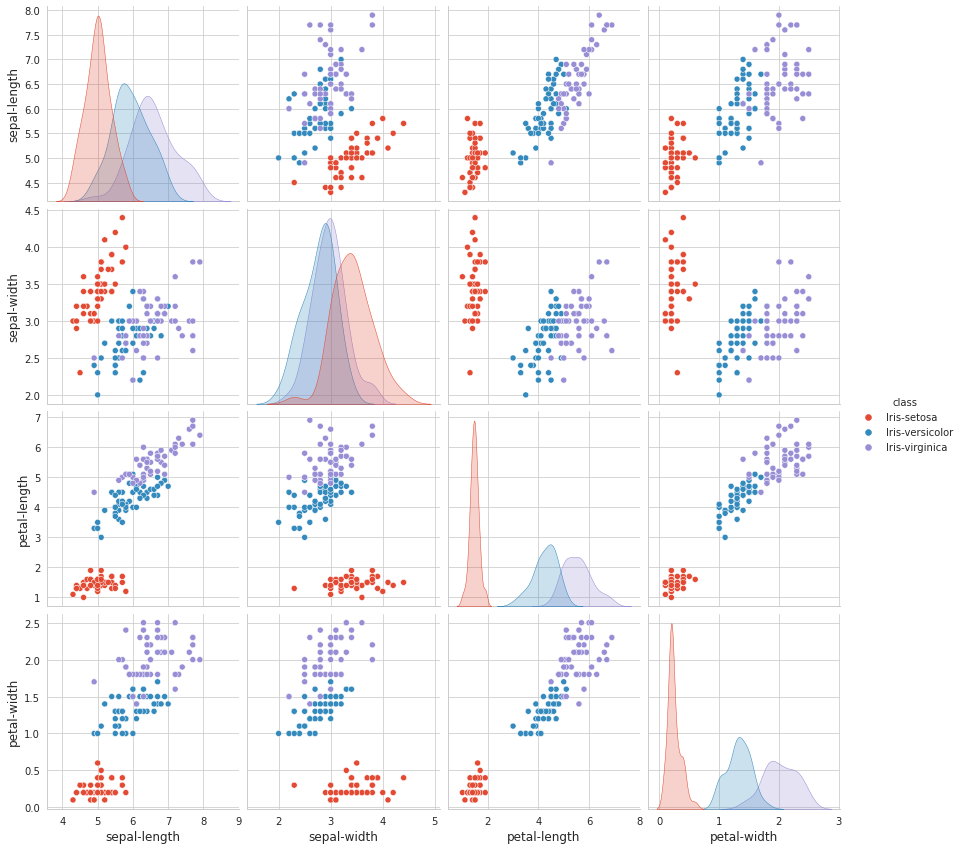

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="class",height=3);
plt.show()

In [ ]:
from sklearn.cluster import KMeans
# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=3)
# Fitting input data4
kmeans = kmeans.fit(X)
# Mendapatkan cluster labels
labels = kmeans.predict(X)
# Mendapatkan nilai centroid
C = kmeans.cluster_centers_
# Mencetak nilai centroid
print(C)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


##Membuat Model

###Model Clustering pada Sepal

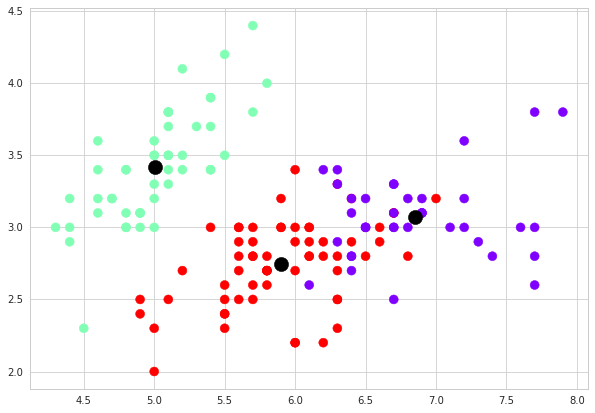

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], s=80, c=kmeans.labels_, cmap='rainbow')
plt.scatter(C[:, 0], C[:, 1], s=200, c='black')

###Model Clustering pada Petal

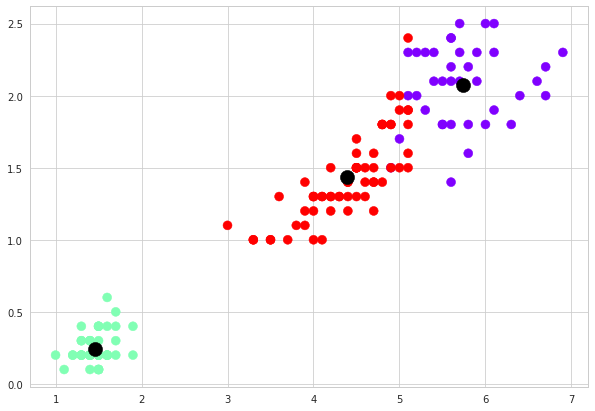

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X[:, 2], X[:, 3], s=80, c=kmeans.labels_, cmap='rainbow')
plt.scatter(C[:, 2], C[:, 3], s=200, c='black')

##Cost k

In [ ]:
clusters = []
for i in range (1, 11):
  # Menentukan jumlah cluster
  kmeans = KMeans(n_clusters=i, random_state=1)
  # Fitting input data
  kmeans = kmeans.fit(X)
  # Mendapatkan cluster labels
  labels = kmeans.predict(X)
  # Menghitung jumlahan jarak antara setiap sampel dengan cluster centroid-nya (SSE)
  inertia = kmeans.inertia_
  clusters.append(inertia)
  print("k:", i, " cost:", inertia)


k: 1  cost: 680.8244
k: 2  cost: 152.36870647733906
k: 3  cost: 78.94084142614602
k: 4  cost: 57.31787321428571
k: 5  cost: 46.56163015873016
k: 6  cost: 38.930963049671746
k: 7  cost: 34.299985543844244
k: 8  cost: 30.290983238178892
k: 9  cost: 28.498320527298787
k: 10  cost: 26.18575937001595


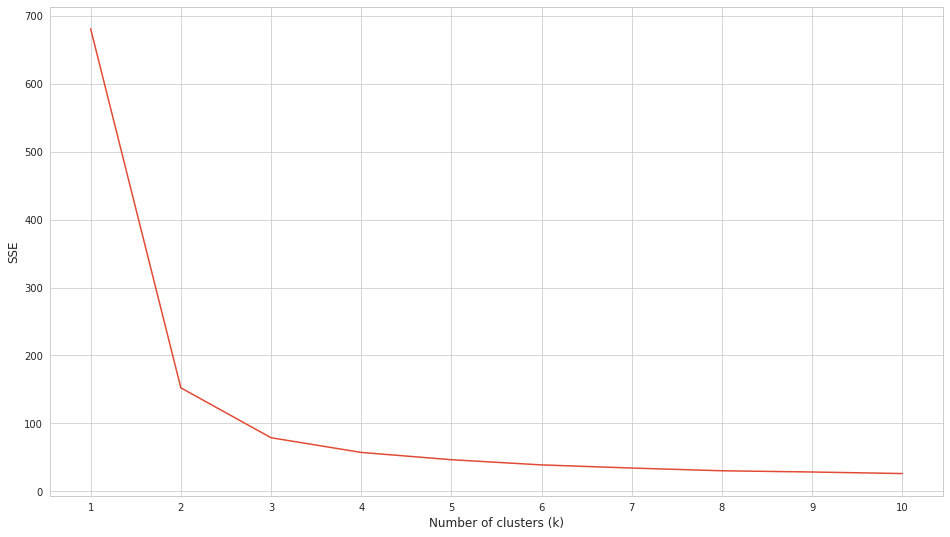

In [ ]:
# Plotting
plt.plot(range(1,11), clusters)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE")
plt.show()

##Nilai Silhouette

In [ ]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(X, labels)

0.31964554543932283

Silhouette score memiliki rentang -1 hingga 1 yang memiliki rumus:
$S = \frac{(b - a)}{max(a, b)}$<br>
di mana<br>
$a$ = rata-rata jarak poin intra-cluster (cluster sendiri)<br>
$b$ = rata-rata jarak poin sample di cluster sendiri dengan poin terdekat di cluster seberang (inter-cluster)<br>

Silhouette score yang bagus memiliki nilai mendekati 1 atau bahkan 1 yang berarti antarcluster benar-benar terpisah.<br>
Dengan nilai 0.3196, nilai silhouette tidak begitu bagus, tetapi juga tidak begitu jelek.

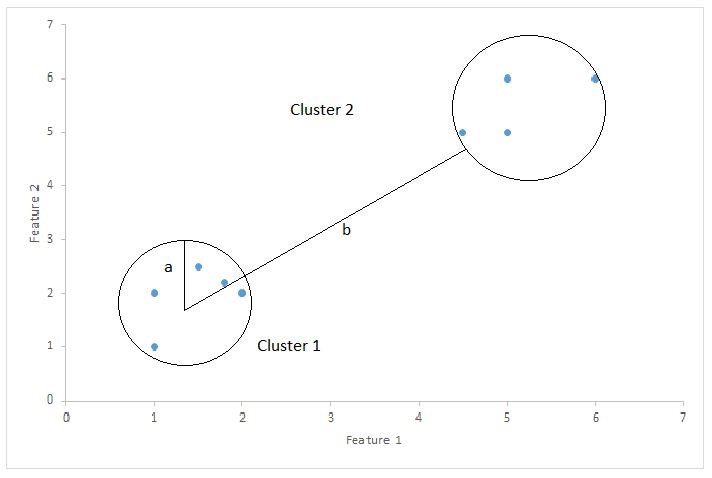

##Best k (tambahan)

In [ ]:
pip install kneed

Berikut adalah algoritma untuk mencari nilai k terbaik dengan menggunakan KneeLocator. KneeLocator mendeteksi pada k berapa diagram mengalami penurunan yang awalnya signifikan kemudian mulai rata. <br>
Dengan menggunakan `curve="convex"` dan `direction="decreasing"` berarti akan mendeteksi elbow dan grafik yang menurun.

The best k of your model is  3


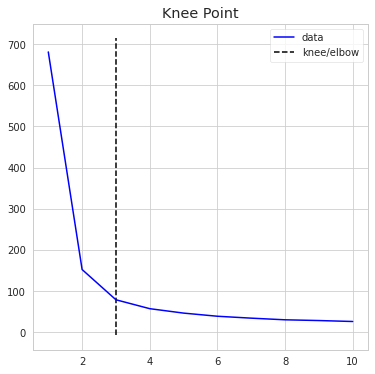

In [ ]:
from kneed import KneeLocator
findknee= KneeLocator(range(1,11),clusters,curve="convex",direction="decreasing")
findknee.plot_knee()
print('The best k of your model is ', findknee.elbow)